# Zillow Report


# Goal

- Discover some potential drivers for property assessed values
- Delvelope ML regresson models for property assessed values prediction
- Reccomend some key factors to predict property assessed values

# Imports

In [6]:
import pandas as pd
import numpy as np
import wrangle as wr
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import wrangle as wr
import functions as m

# Acquire

- data acquired from SQL server
- 52441 rows before cleaning
- each row repersents a single family home

# Prepare

- removed 83 NANs
- removed outliers
- renamed columns
    - bedroomcnt : bedrooms
    - bathroomcnt : bathrooms
    - calculatedfinishedsquarefeet : area
    - taxvaluedollarcnt : tax_value
    - transactiondate : sale_date
- Split data into train, validate, and test (approx. 56/24/20) 
- scaled data with minmax scaler

# Data Dictionary



|  Feature | Values | Description                                  |
|-------------|:-----------:|-------------------------------------------------------------------------------------------------|
| tax_value    | integer       | The cost of the property       |
| Bedrooms |    integer    | The amount of bedrooms the property has |
| Bathrooms | integer   | The amount of bathrooms the property has  |
| Area| integer  | The area (squarefeet) the property has |
| Fips| integer | The county and state code |
| Sale_date | date yyyy/mm/dd str | The sale date of the property                                                           |

# A look at the data

### Train, Validate, Test

In [2]:
# Bringing in the data already split into train, validate and test
train, val, test = wr.wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-289.0
<class 'numpy.float64'>
-444583.125


In [3]:
# First 5 rows of the data
train.head()

,bedrooms,bathrooms,area,tax_value,fips,sale_date
31478,4.0,2.0,1425.0,147333.0,6059.0,2017-06-15
30505,3.0,2.0,1160.0,475000.0,6037.0,2017-06-09
44417,2.0,1.0,720.0,37645.0,6037.0,2017-08-11
36508,4.0,2.0,1599.0,75122.0,6037.0,2017-07-04
17712,3.0,2.0,1236.0,658896.0,6037.0,2017-04-14


# A summary of the data

In [4]:
# A summary of the train data minus fips column 
train.drop(columns='fips').describe()

,bedrooms,bathrooms,area,tax_value
count,26073.000000,26073.000000,26073.000000,2.607300e+04
mean,3.230353,2.129310,1736.301423,3.870435e+05
std,0.791575,0.745082,645.384315,2.616834e+05
min,2.000000,1.000000,326.000000,1.000000e+03
25%,3.000000,2.000000,1248.000000,1.785690e+05
50%,3.000000,2.000000,1595.000000,3.441690e+05
75%,4.000000,3.000000,2109.000000,5.379860e+05
max,5.000000,4.000000,3858.000000,1.255500e+06


# Explore

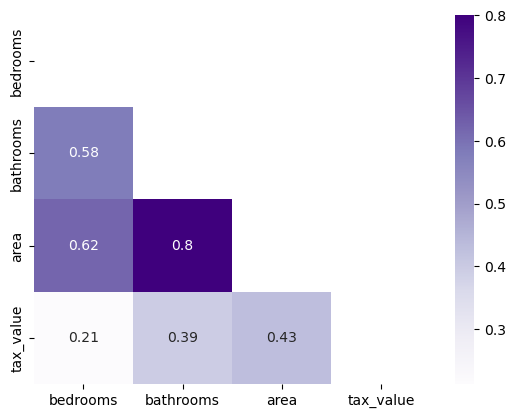

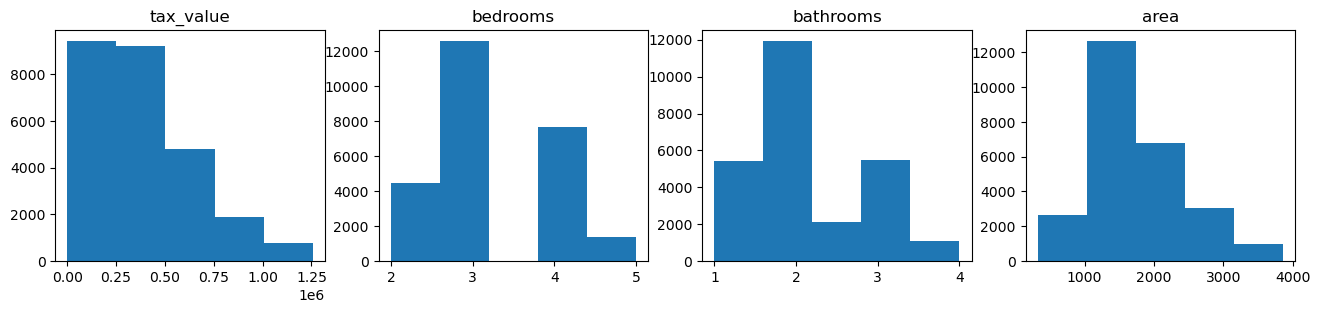

In [5]:
# get the distibution and correlation visuals of the features
m.get_distribution_and_corr(train)

- features have not normal distribution
- correlation pretty low for the features and the target


## Q1 What is the relationship bedrooms and tax_value?

#### H$_ø$: There is no realationship between bedrooms and tax_value
#### H$_a$: There is a relationshop between bedrroms and tax_value